In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [2]:
vals = np.array(list(product(np.arange(1, 7), repeat=2)))
probs = np.ones(len(vals)) / 36
vals = np.array(list(map(sum, vals)))

In [3]:
df = pd.DataFrame({'values': vals, 'probabilities': probs}).groupby('values')['probabilities'].sum()
x_values = df.index.to_numpy()
x_probabilities = df.values

Математическое ожидание

In [4]:
m = (x_values * x_probabilities).sum().round()

Дисперсия

In [5]:
d = (((x_values - m)**2) * x_probabilities).sum()

Биномиальное распределение

In [6]:
def bernoulli_proba(k, n, p):
    return (np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))) * p**k * (1 - p)**(n-k) 

n = 3
p = 0.5
k1 = 0
k2 = 1
k3 = 2
k4 = 3

p_k1 = bernoulli_proba(k1, n, p)
p_k2 = bernoulli_proba(k2, n, p)
p_k3 = bernoulli_proba(k3, n, p)
p_k4 = bernoulli_proba(k4, n, p)

p_k1, p_k2, p_k3, p_k4

(0.125, 0.375, 0.375, 0.125)

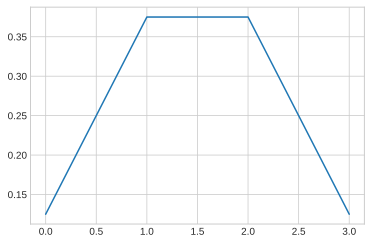

In [7]:
plt.plot([p_k1, p_k2, p_k3, p_k4])
plt.show()

In [8]:
m = n * p
d = n * p * (1 - p)
m, d

(1.5, 0.75)

Распределение Пуассона

In [9]:
def poisson_proba(k, l):
    return (l**k * np.exp(-l)) / np.math.factorial(k)

l = 30
k1 = 30
k2 = range(0, 16)
k3 = range(0, 51)

p_k1 = round(poisson_proba(k1, l) * 100, 3)
p_k2 = round(sum(poisson_proba(k, l) for k in k2) * 100, 3)
p_k3 = round((1 - sum(poisson_proba(k, l) for k in k3)) * 100, 3)

p_k1, p_k2, p_k3

(7.263, 0.195, 0.03)

In [10]:
m, d = l, l
m, d

(30, 30)

#### Задача 1. Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. 

In [11]:
n = 5 # количество вопросов
p = 0.25 # вероятность ответить случайно на 1 вопрос

m = n * p
m

1.25

#### Задача 2. Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите дисперсию случайной величины X.

In [12]:
n = 5 # количество вопросов
p = 0.25 # вероятность ответить случайно на 1 вопрос

d = n * p * (1 - p)
d

0.9375

#### Задача 3. Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [13]:
lambda_ = 10
n = 1
k = range(n)

lt = sum([poisson_proba(i, lambda_) for i in k])
while lt < 0.95:
    n += 1
    k = range(n)
    lt = sum([poisson_proba(i, lambda_) for i in k])
    
n - 1, lt

(15, 0.9512595966960214)

#### Задача 4. Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

In [14]:
p = 0.01
k = 6
n = 6

p_n = 1 - sum(bernoulli_proba(i, n, p) for i in range(k))
while p_n < 0.9:
    n += 1
    p_n = 1 - sum(bernoulli_proba(i, n, p) for i in range(k))
    
n, p_n

(926, 0.9003627121531355)